<a href="https://colab.research.google.com/github/HARDECOMM/HDA-MLPortfolio/blob/main/Sexual_Transmitted_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>SEXUAL TRANSMITTED DISEASE</center>

## EXPLORATORY DATA ANALYSIS

**The analysis was performed to invetigate the prevalnece of sexual transmitted diseases among americans based on the available data**

## Data Description

- The data was dowloaded from data.world as csv files
- The data represent STD_Cases of about 52 states in the United State of America.
- The data contains records from 1996 to 2014
- The data contain 42,631 observations and 10 individual features
- The total records in the entire dataset is 425300
- The data was  pre-prepared by ms-excel, and later imported to the python for thoroughly cleaning and exploration.
- About 7047 Null Values(NaN) was dropped from the dataset to achieve consistency.
- Also the outliers in numerical data was handled  by IQR methods
- The year data was converted to a datetime data to perform temporal analysis easily
- The exaplotory data analysis otherwise known as EDA was conducted based on the pre-defined and specific|  questions.


In [ ]:
## To begin with importation of the neccesary libraries for statistical, exploratory and visualization data analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# I import the data set to use for the analysis

Std_Data = 'Std_data.csv'
df = pd.read_csv(Std_Data)

## Data Exploration

In [ ]:
df.columns

Index(['Disease', 'Disease Code', 'State', 'Year', 'Gender', 'Age Group',
       'STD Cases', 'Population', 'Rate per 100K'],
      dtype='object')

In [ ]:
df.shape

(42530, 9)

In [ ]:
df.size

382770

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42530 entries, 0 to 42529
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Disease        42530 non-null  object 
 1   Disease Code   42530 non-null  int64  
 2   State          42530 non-null  object 
 3   Year           42530 non-null  int64  
 4   Gender         42530 non-null  object 
 5   Age Group      42530 non-null  object 
 6   STD Cases      42530 non-null  int64  
 7   Population     42530 non-null  int64  
 8   Rate per 100K  42530 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 2.9+ MB


In [ ]:
df.describe()

,Disease Code,Year,STD Cases,Population,Rate per 100K
count,42530.000000,42530.000000,42530.000000,4.253000e+04,42530.000000
mean,283.795533,2005.240607,603.133647,4.389793e+05,325.661552
std,13.723063,5.431696,1973.091099,6.946951e+05,637.138688
min,274.000000,1996.000000,1.000000,1.293700e+04,0.020000
25%,274.000000,2001.000000,8.000000,1.099400e+05,9.980000
50%,280.000000,2005.000000,59.000000,2.508620e+05,117.500000
75%,280.000000,2010.000000,380.000000,4.389790e+05,325.660000
max,310.000000,2014.000000,46885.000000,8.880836e+06,9078.950000


In [ ]:
# I droped about thousands of null missing values to aid my works

df.dropna(inplace = True)

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head(3)

,disease,disease code,state,year,gender,age group,std cases,population,rate per 100k
0,Chlamydia,274,Alabama,1996,Male,0-14,25,468394,5.34
1,Chlamydia,274,Alabama,1996,Male,15-19,164,165920,98.84
2,Chlamydia,274,Alabama,1996,Male,20-24,193,152848,126.27


## Data cleaning and transformation

In [ ]:
# I convert the year to datetime data in other to work on time series
year_format = "%Y"

df.year = pd.to_datetime(df.year, format = year_format)

In [ ]:
# I removed the outliers with IQR method
data = df['std cases']

q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
thresh = 1.5
lb = q1 - thresh * iqr
up = q3 = thresh * iqr
outlier = df[(df['std cases'] < lb) | (df['std cases'] > up)]
df = df.drop(outlier.index)

## Data Analysis/Insight Generation

''' **The analysis was performed based on the following questions**'''
- What is the prevalence of std over time
- what pattern of distribution does std follow.
- what is the rate of std across different age group
- How does std affect by gender
- what are the top ten states affected by std
- The prevalence of std by disease types


## 1. What is the prevalence of std over time

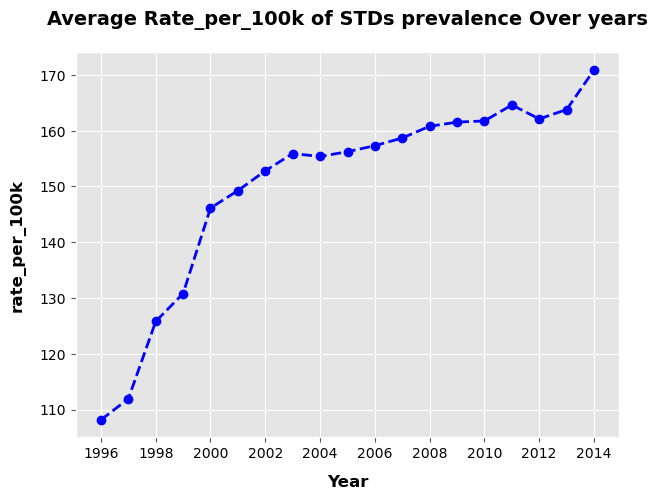

CHART DESCRIPTION: There is an upward trends over time which means as the time increases, the rate at which the std prevalent increases


In [ ]:
from matplotlib import style
style.use('ggplot')

plt.figure(figsize = (7, 5))

trend_analysis = df.groupby('year')['rate per 100k'].mean()

x = trend_analysis.index
y = trend_analysis.values

plt.plot(x, y, linewidth=2, color='blue', linestyle='dashed', marker='o', markersize=6)

plt.xlabel('Year', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('rate_per_100k', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.title("Average Rate_per_100k of STDs prevalence Over years", fontsize=14, fontweight='bold', color='black', pad=20)
plt.xticks(fontsize=10, color = 'black')
plt.yticks(fontsize=10, color = 'black')
plt.show()

Chart_description = 'There is an upward trends over time which means as the time increases, the rate at which the std prevalent increases'
print(f"CHART DESCRIPTION: {Chart_description.capitalize()}")


## 2. What patterns of distribution does STD_cases follows

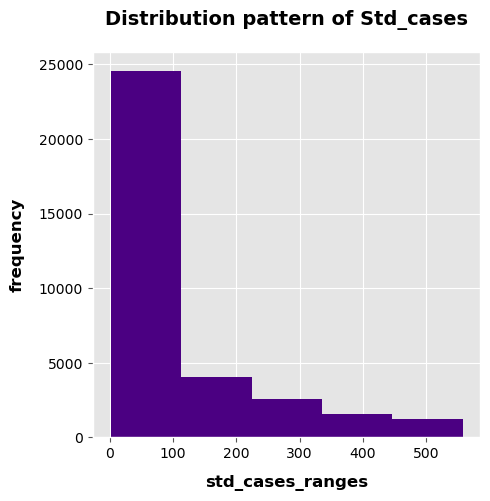

CHART DESCRIPTION: The distribution shape of std_cases is positively skewed to the right, show the disease focus more on highest cases


In [ ]:
plt.figure(figsize = (5, 5))

x = df['std cases']

plt.hist(x, bins = 5, color = 'indigo')
plt.xlabel('std_cases_ranges', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.ylabel('frequency', fontsize=12, fontweight='bold', color='black', labelpad=10)
plt.title('Distribution pattern of Std_cases', fontsize=14, fontweight='bold', color='black', pad=20)
plt.xticks(fontsize=10, color = 'black')
plt.yticks(fontsize=10, color = 'black')
plt.show()

Chart_description = "The distribution shape of std_cases is positively skewed to the right, show the disease focus more on highest cases"
print(f"CHART DESCRIPTION: {Chart_description.capitalize()}")

## 3. What is the rate of std across different age group

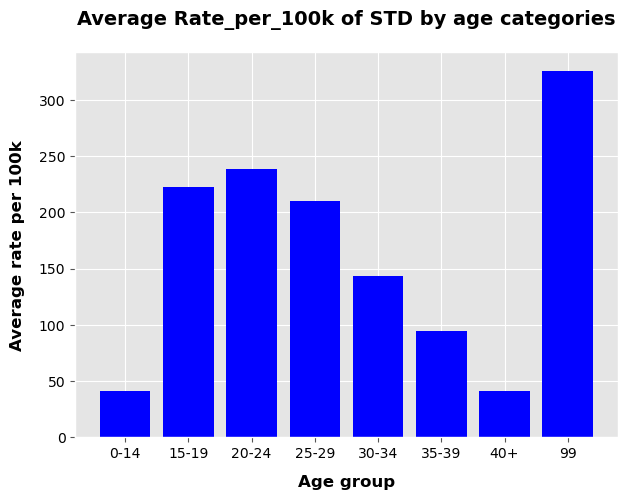

CHART DESCRIPTION: Chart description: as we can see, the age group between 20 - 29 has the highest rate of sexual transmitted disease followed by age 15 -19, indicated the std is more prevalent among the under 30.


In [ ]:
plt.figure(figsize = (7, 5))

rate_age = df.groupby('age group')['rate per 100k'].mean()
x = rate_age.index
y = rate_age.values

plt.bar(x, y, color = 'blue')
plt.xlabel("Age group", fontsize=12, fontweight='bold', color='black', labelpad=10 )
plt.ylabel("Average rate per 100k", fontsize=12, fontweight='bold', color='black', labelpad=10 )
plt.title("Average Rate_per_100k of STD by age categories", fontsize=14, fontweight='bold', color='black', pad=20)
plt.xticks(fontsize = 10, color = 'black' )
plt.yticks(fontsize = 10, color = 'black' )
plt.show()

Chart_description = 'Chart description: As we can see, the age group between 20 - 29 has the highest rate of sexual transmitted disease followed by age 15 -19, indicated the std is more prevalent among the under 30.'
print(f"CHART DESCRIPTION: {Chart_description.capitalize()}")

## 4. How does std affect by Gender

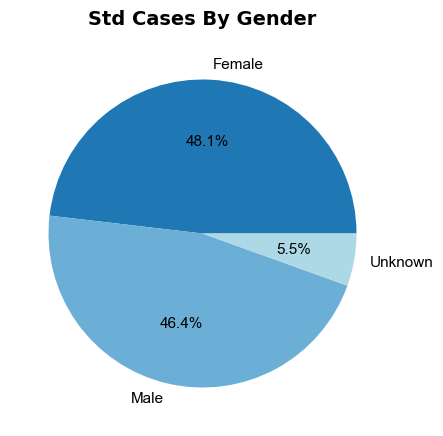

CHART DESCRIPTION: Chart description: the most affected gender is females of about 48%, follow by male and then people unknown.


In [ ]:
plt.figure(figsize = (5, 5))

gender_by_disea = df.groupby('gender')['std cases'].mean()
x = gender_by_disea

labels = ['Female', 'Male', 'Unknown']
colors = ['#1f77b4', '#6baed6', 'lightblue']
textprops = {'color': 'black', 'font':'Arial', 'size':11}

plt.pie(x, labels = labels, colors = colors, textprops = textprops, autopct = "%1.1f%%")
plt.title("Std Cases By Gender", fontsize = 14, fontweight = 'bold', pad = 12, color = 'black')
plt.show()

Chart_description = "Chart description: the most affected gender is females of about 48%, follow by male and then people unknown."
print(f"CHART DESCRIPTION: {Chart_description.capitalize()}")

## 5. What are the top 10 states affected by the Std

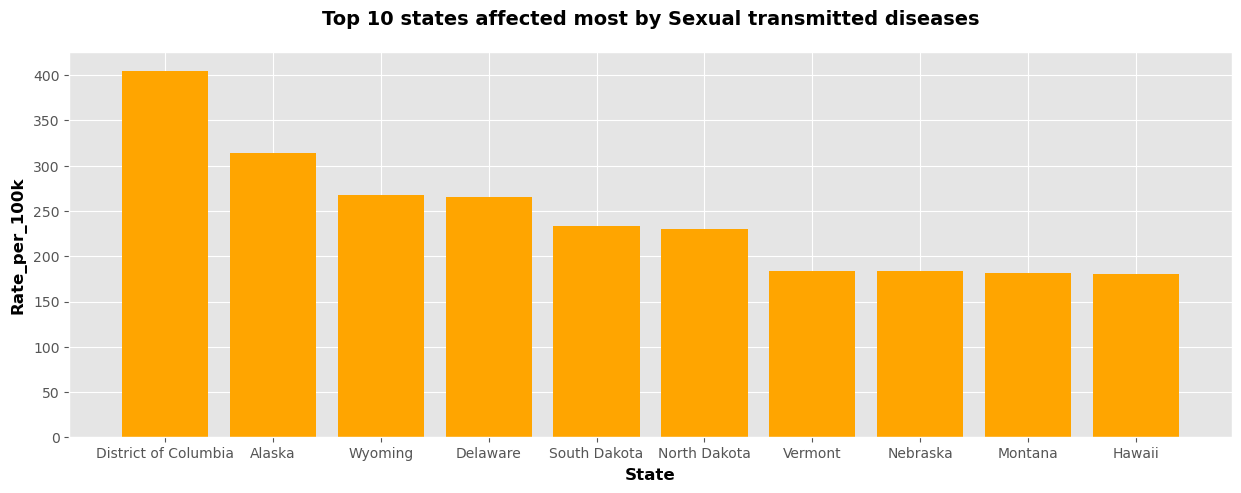

CHART DESCRIPTION: Chart description: as you can see,  by the top 10 states, the most affected states is district of columbia followed by alaska, and the delaware.


In [ ]:
plt.figure(figsize = (15, 5))

rate_state = df.groupby('state')['rate per 100k'].mean().sort_values(ascending = False).head(10)

x = rate_state.index
y = rate_state.values

plt.bar(x, y, color='orange')

plt.xlabel('State', fontsize=12, fontweight='bold', color='black', labelpad=5)
plt.ylabel('Rate_per_100k', fontsize=12, fontweight='bold', color='black', labelpad=5)
plt.title("Top 10 states affected most by Sexual transmitted diseases", fontsize=14, fontweight='bold', color='black', pad=20)


plt.show()


Chart_description = "Chart description: As you can see,  by the top 10 states, the most affected states is District of Columbia followed by Alaska, and the Delaware."
print(f"CHART DESCRIPTION: {Chart_description.capitalize()}")


## 6. The prevalence of std by disease types

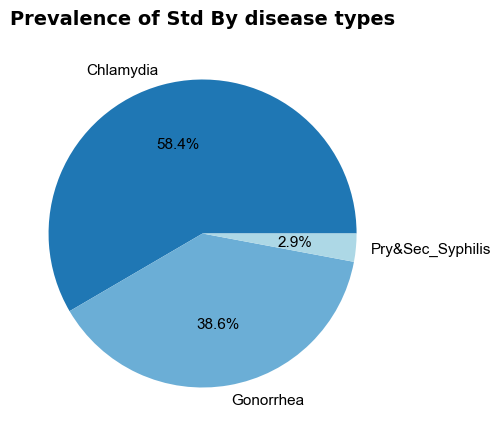

CHART DESCRIPTION: Chart description: as you can see,  the most affected type is chamydia which is 64.2% by the average rate followed by gonorrhea


In [ ]:
plt.figure(figsize = (5, 5))

rate_disease = df.groupby('disease')['rate per 100k'].mean()
x = rate_disease

labels = ['Chlamydia', 'Gonorrhea', 'Pry&Sec_Syphilis']
colors = ['#1f77b4', '#6baed6', 'lightblue']
textprops = {'color': 'black', 'font':'Arial', 'size':11}

plt.pie(x, labels = labels, colors = colors, textprops = textprops, autopct = "%1.1f%%")
plt.title("Prevalence of Std By disease types", fontsize = 14, fontweight = 'bold', pad = 12, color = 'black')
plt.show()

Chart_description = "Chart description: As you can see,  the most affected type is Chamydia which is 64.2% by the average rate followed by Gonorrhea"
print(f"CHART DESCRIPTION: {Chart_description.capitalize()}")